## **Probability and Statistics**


The journey into Statistics this week can be distilled into the following objectives:

a) Conduct Quantitative Data Analysis

b) Perform Graphical Data Analysis

c) Use Statistical Techniques to make quantitative statements on data (encompassing discrete and continuous variables)



In this Sprint Challenge, we are going to use the "Loans" data set. The data set contains information about applicants who have applied for home loans, their monthly incomes, the loan amount (in 000's) the property type they are seeking, Credit History (0 indicates no credit history) and their associated loan status.



The dataset can be retrieved from here: https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1

Create solutions for the following code blocks. This exercise should take ~ 3 hours.

Share with mlsubmissions@lambdaschool.com when finished.


In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

In [0]:
df = pd.read_csv('https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1')
print(df.head())

     LoanID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   CreditHistory PropertyArea LoanStatus  
0            1.0        Urban          Y  
1            1.0        Rural          N  
2            1.0        Urban

**Step 1:** Examine the data set for any missing values

In [0]:
# search for nulls
df.isnull().any()

LoanID               False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
CreditHistory         True
PropertyArea         False
LoanStatus           False
dtype: bool

In [0]:
# search for # of nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
LoanID               614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
CreditHistory        564 non-null float64
PropertyArea         614 non-null object
LoanStatus           614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [0]:
# value counts for visualization of common responses in categories with nulls

print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['LoanAmount'].value_counts().head(8))
print(df['CreditHistory'].value_counts())
print(df['Loan_Amount_Term'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
Name: LoanAmount, dtype: int64
1.0    475
0.0     89
Name: CreditHistory, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [0]:
df[df['CreditHistory'].isnull() == True].head()

,LoanID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CreditHistory,PropertyArea,LoanStatus
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [0]:
# look at nulls for married to see if there was any dependent information

df[df['Married'].isnull() == True]

,LoanID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CreditHistory,PropertyArea,LoanStatus
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


**Step 2:** If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please use the tips provided in the article to deal with missing values

In [0]:
df.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

In [0]:
# create a second duplicate dataset to alter so that the original dataset stays in tact if I need to reference it

# Load Dataset
df2 = pd.read_csv('https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1')

# replace Gender nulls with 'unknown'
df2['Gender'] = df2['Gender'].fillna('Unknown')

# replace Married nulls with 'No' for unmarried
# unmarried less common, but only 3 nulls and all 3 are missing dependent info as well
df2['Married'] = df2['Married'].fillna('No')

# nulls for dependents replaced with '0', which is the mode
df2['Dependents'] = df2['Dependents'].fillna(0)

# self employed nulls replaced with mode of 'not self employed'
df2['Self_Employed'] = df2['Self_Employed'].fillna('No')

# Loan Amount nulls replaced with median
df2['LoanAmount'] = df2['LoanAmount'].fillna(df2['LoanAmount'].median())


# Loan Amount Term nulls filled with mode of 360 month
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].fillna(360)
                                             
# Credit History nulls filled with mode of '1'
df2['CreditHistory'] = df2['CreditHistory'].fillna(1)

# replace dependents value of '3+' with numerical value '3'
df2['Dependents'] = df2['Dependents'].replace('3+', 3)

# create new column: 'TotalIncome'
df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']

In [0]:
# called df.head(50) to check data for any obvious errors in transformation process
# df2.head(50)

**Step 3:**  Conduct Quantitative Data Analysis - Compute summary statistics i.e. Mean, Median, Standard Deviation, Variance for:

1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

In [0]:
# create summary stats function

def summary_stats(data):
  mean = np.mean(data)
  median = np.median(data)
  standard_dev = np.std(data)
  variance = np.var(data)
  return {'mean':mean,'median':median,'standard deviation':standard_dev,
            'variance':variance}    

In [0]:
print("Applicant Income")
print(summary_stats(df2['ApplicantIncome']))
print("\n")

print("Total Income")
print(summary_stats(df2['ApplicantIncome'] + df2['CoapplicantIncome']))
print("\n")

print("Loan Amount")
print(summary_stats(df2['LoanAmount']))
print("\n")

print("Loan Term")
print(summary_stats(df2['Loan_Amount_Term']))

Applicant Income
{'mean': 5403.459283387622, 'median': 3812.5, 'standard deviation': 6104.0648565338915, 'variance': 37259607.77277212}


Total Income
{'mean': 7024.705081414722, 'median': 5416.5, 'standard deviation': 6453.402230691897, 'variance': 41646400.351099156}


Loan Amount
{'mean': 145.75244299674267, 'median': 128.0, 'standard deviation': 84.03871423798937, 'variance': 7062.505490774437}


Loan Term
{'mean': 342.4104234527687, 'median': 360.0, 'standard deviation': 64.37614137743927, 'variance': 4144.287578648049}


**Step 4:** Perform Graphical Data Analysis:

a) Contruct an ECDF to analyze the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

b) Overlay each of the ECDF plots with markers (i.e. Diamonds) depicting the corresponding 25th, 50th and 75th percentiles respectively

c) Build Histograms to examine the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

d) Create BoxPlots to understand the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

e) Construct Bee Swarm Plots to analyze the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

g) Plot a Stacked Bar Chart showcasing Count of Applicants by Loan Status and Gender. The Gender attribute is color coded within the stacked bar chart

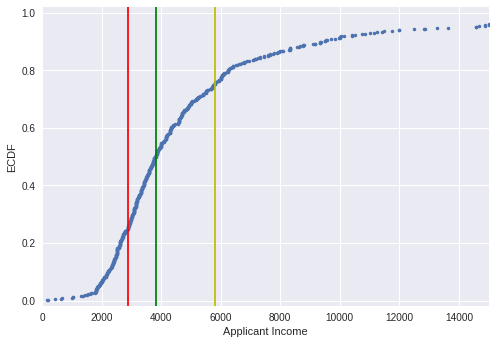

In [0]:
go


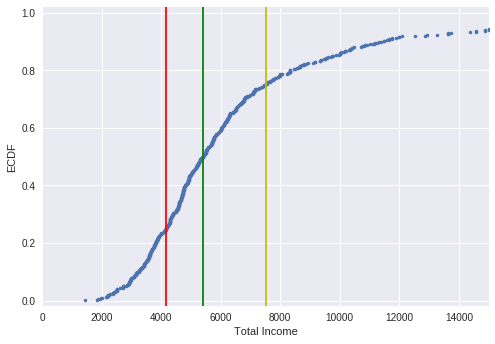

In [0]:
# Total Income

x = np.sort(df2['TotalIncome'])
y = np.arange(1, len(x) + 1) / len(x)

percentiles = np.array([25,50,75])
ptiles = np.percentile(df2['TotalIncome'], percentiles)

plt.plot(x,y, marker='.', linestyle='none')
plt.axvline(x=ptiles[0], color='r')
plt.axvline(x=ptiles[1], color='g')
plt.axvline(x=ptiles[2], color='y')
plt.xlim(0, 15000)
plt.xlabel('Total Income')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

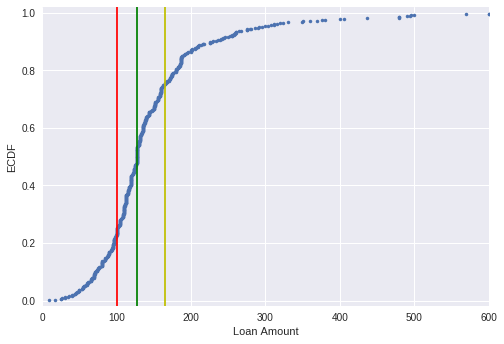

In [0]:
# Loan Amount

x = np.sort(df2['LoanAmount'])
y = np.arange(1, len(x) + 1) / len(x)

percentiles = np.array([25,50,75])
ptiles = np.percentile(df2['LoanAmount'], percentiles)

plt.plot(x,y, marker='.', linestyle='none')
plt.axvline(x=ptiles[0], color='r')
plt.axvline(x=ptiles[1], color='g')
plt.axvline(x=ptiles[2], color='y')
plt.xlim(0, 600)
plt.xlabel('Loan Amount')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

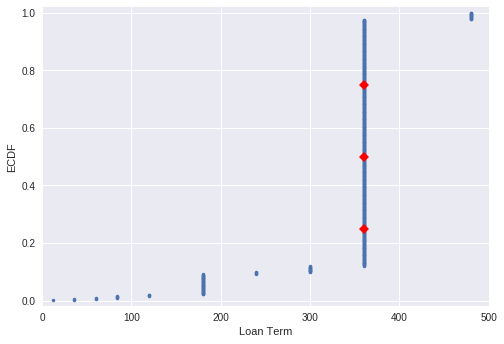

In [0]:
# Loan Term

x = np.sort(df2['Loan_Amount_Term'])
y = np.arange(1, len(x) + 1) / len(x)

percentiles = np.array([25,50,75])
ptiles = np.percentile(df2['Loan_Amount_Term'], percentiles)

plt.plot(x,y, marker='.', linestyle='none')
plt.plot(ptiles, percentiles/100, marker='D', color='red', linestyle='none')
plt.xlim(0, 500)
plt.xlabel('Loan Term')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

c) Build Histograms to examine the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

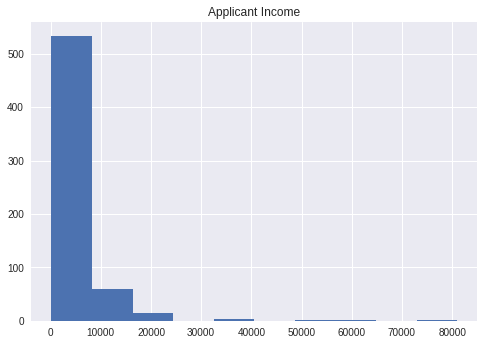

In [0]:
# Applicant Income
plt.hist(df2['ApplicantIncome'])
plt.title('Applicant Income');

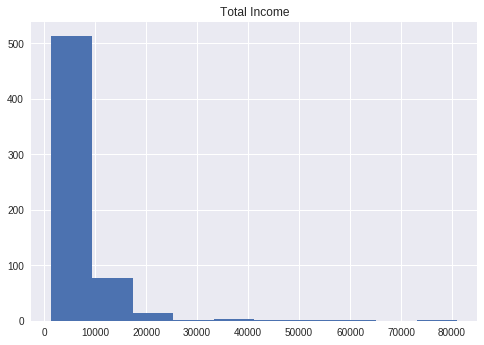

In [0]:
plt.hist(df2['TotalIncome'])
plt.title('Total Income');

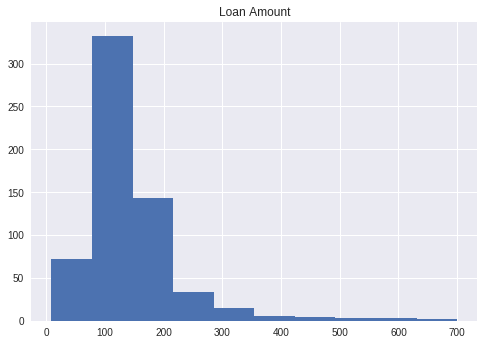

In [0]:
plt.hist(df2['LoanAmount'])
plt.title('Loan Amount');

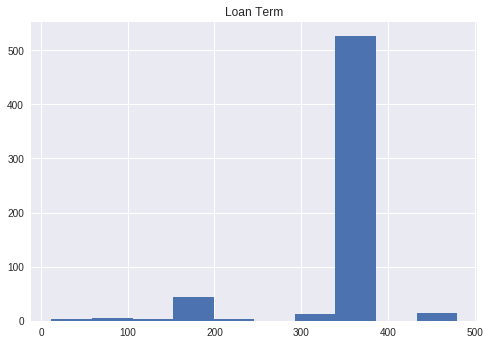

In [0]:
plt.hist(df2['Loan_Amount_Term'])
plt.title('Loan Term');

d) Create BoxPlots to understand the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


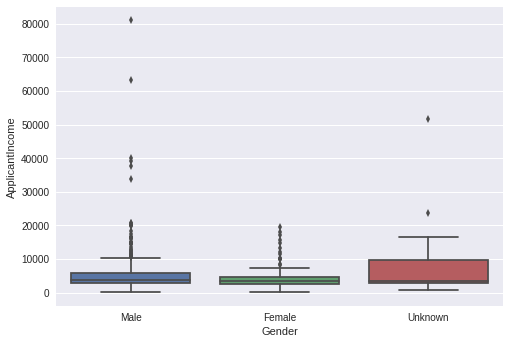

In [0]:
# Applicant Income by Gender
sns.boxplot(df2['Gender'], df2['ApplicantIncome']);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


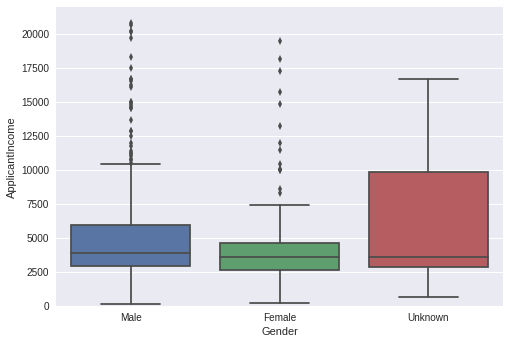

In [0]:
# Applicant Income (w/ Fewer Outliers)
sns.boxplot(df2['Gender'], df2['ApplicantIncome'])
plt.ylim(0,22000);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


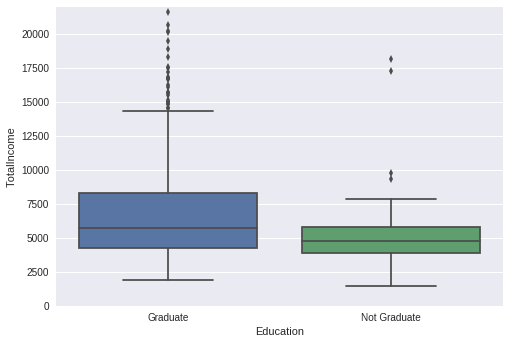

In [0]:
# Applicant Income vs Education
sns.boxplot(df2['Education'], df2['TotalIncome'])
plt.ylim(0,22000);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


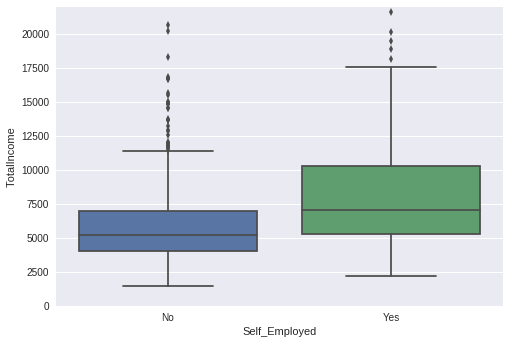

In [0]:
# Applicant Income vs Education
sns.boxplot(df2['Self_Employed'], df2['TotalIncome'])
plt.ylim(0,22000);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 600)

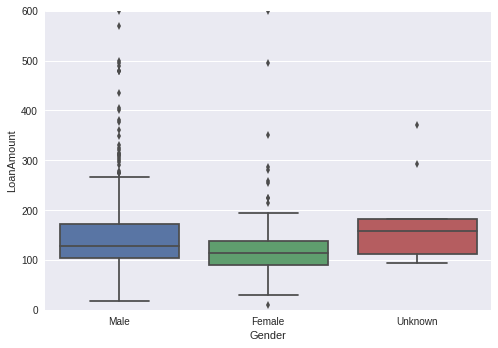

In [0]:
# Loan Amount by Gender
sns.boxplot(df2['Gender'], df2['LoanAmount'])
plt.ylim(0,600)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 600)

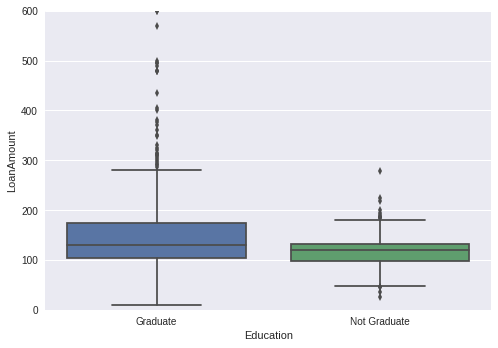

In [0]:
# Loan Amount by Education
sns.boxplot(df2['Education'], df2['LoanAmount'])
plt.ylim(0,600)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 600)

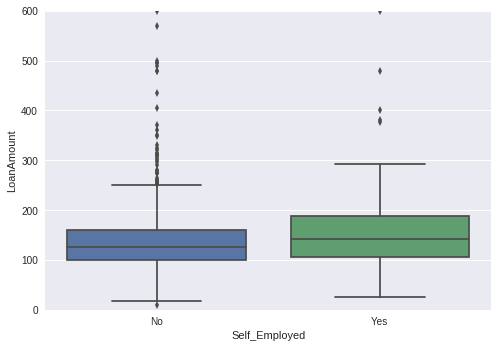

In [0]:
# Loan Amount by Self Employed
sns.boxplot(df2['Self_Employed'], df2['LoanAmount'])
plt.ylim(0,600)

e) Construct Bee Swarm Plots to analyze the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

(0, 42000)

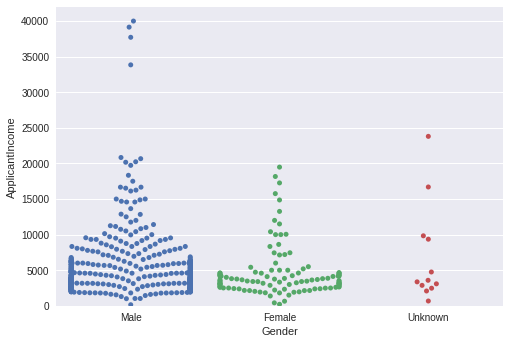

In [0]:
# Gender vs Applicant Income
sns.swarmplot(df2['Gender'], df2['ApplicantIncome'])
plt.ylim(0,42000)

(0, 42000)

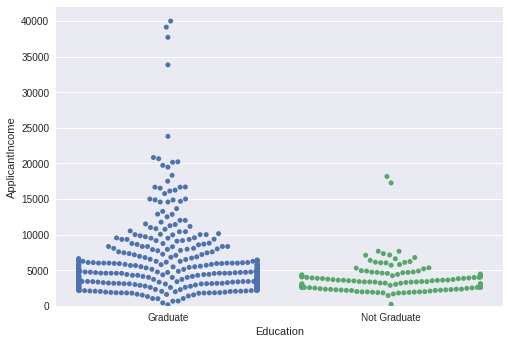

In [0]:
# Education vs Applicant Income
sns.swarmplot(df2['Education'], df2['ApplicantIncome'])
plt.ylim(0,42000)

(0, 42000)

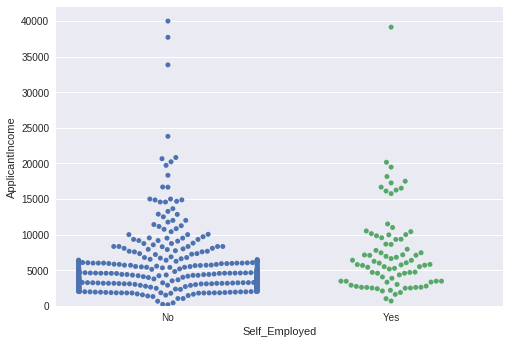

In [0]:
# Education vs Applicant Income
sns.swarmplot(df2['Self_Employed'], df2['ApplicantIncome'])
plt.ylim(0,42000)

(0, 700)

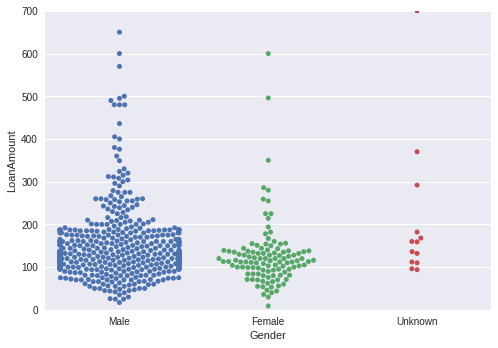

In [0]:
# Gender vs Loan Amount
sns.swarmplot(df2['Gender'], df2['LoanAmount'])
plt.ylim(0,700)

(0, 700)

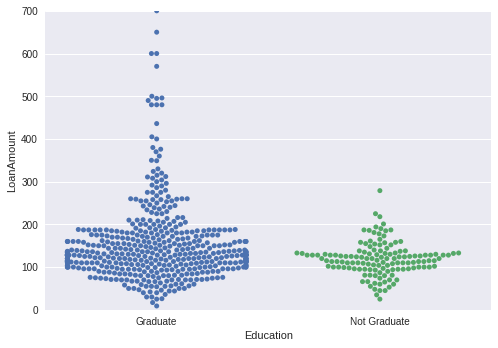

In [0]:
# Education vs Loan Amount
sns.swarmplot(df2['Education'], df2['LoanAmount'])
plt.ylim(0,700)

(0, 700)

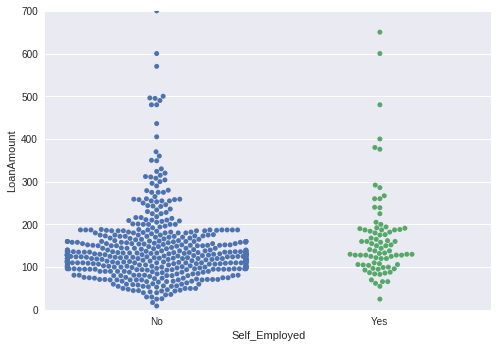

In [0]:
# Self Employed vs Loan Amount
sns.swarmplot(df2['Self_Employed'], df2['LoanAmount'])
plt.ylim(0,700)

g) Plot a Stacked Bar Chart showcasing Count of Applicants by Loan Status and Gender. The Gender attribute is color coded within the stacked bar chart

In [0]:
# could not figure this part out

men = (df2['Gender'] == 'Male').sum()
women = (df2['Gender'] == 'Female').sum()
ls0 = (df2['LoanStatus'] == 'Y').sum()
ls1 = (df2['LoanStatus'] == 'N').sum()
print(men)
print(women)


N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, men, width)
# p2 = plt.bar(ind, women, width,
#              bottom=men)

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()

489
112


**Step 5: ** Compute the chances of securing/getting a loan based on Credit History

Hint: Will require the use of the crosstab function

In [0]:
df2.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'TotalIncome'],
      dtype='object')

In [0]:
# Raw Data
pd.crosstab(df2['CreditHistory'], df2['LoanStatus'])

LoanStatus,N,Y
CreditHistory,,
0.0,82,7
1.0,110,415


In [0]:
# By Percentage
pd.crosstab(df2['CreditHistory'], df2['LoanStatus'], normalize='index')

LoanStatus,N,Y
CreditHistory,,
0.0,0.921348,0.078652
1.0,0.209524,0.790476


**Step 6:** Use Statistical Techniques to make quantitative statements on data

**1)** Detect relationships in the Loan dataset. 

For example: 

a) Does the 'Applicant Income' and the 'Loan Amount' vary together? Construct a scatter plot that plots the 'Applicant Income' v/s "Loan Amount"'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. 

b) Does the 'Total Income' and the 'Loan Amount' vary together? Construct a scatter plot that plots the 'Total Income' v/s "Loan Amount"'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

c) Are there any other variables that vary together? Construct a scatter plot that plots the respective variables. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.


**2)** Gauge the strength of the relationships

For example:

a) Compute the Correlation Coefficient between the 2 variable i.e. 'Applicant Income' and the 'Loan Amount'.

b) Compute the Correlation Coefficient between the 2 variable i.e. 'Total Income' and the 'Loan Amount'.
 
c) Compute the Correlation Coefficient between the pair of variables you have identied
  

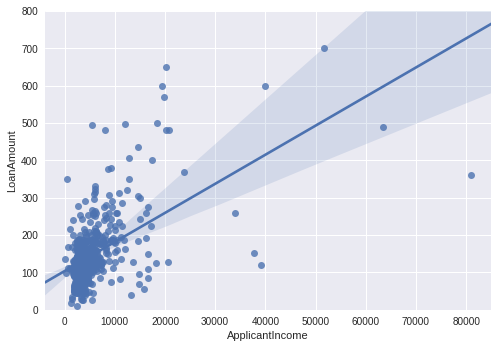

In [0]:
plt.ylim(0,800)
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df2)

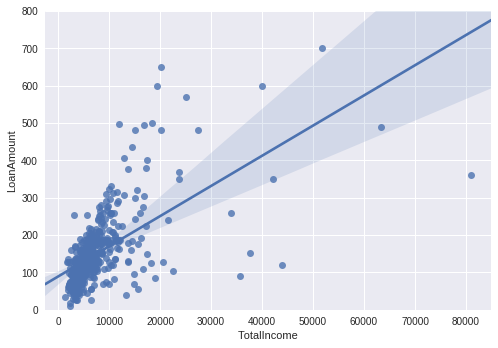

In [0]:
plt.ylim(0,800)


sns.regplot(x='TotalIncome', y='LoanAmount', data=df2)

In [0]:
df2.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'TotalIncome'],
      dtype='object')

In [0]:
# create another copy of dataset; this time with label encoder for categorical variables
from sklearn.preprocessing import LabelEncoder

# Load Dataset
df3 = pd.read_csv('https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1')

# replace Gender nulls with 'unknown'
df3['Gender'] = df3['Gender'].fillna('Unknown')

# replace Married nulls with 'No' for unmarried
# unmarried less common, but only 3 nulls and all 3 are missing dependent info as well
df3['Married'] = df3['Married'].fillna('No')

# nulls for dependents replaced with '0', which is the mode
df3['Dependents'] = df3['Dependents'].fillna(0)

# self employed nulls replaced with mode of 'not self employed'
df3['Self_Employed'] = df3['Self_Employed'].fillna('No')

# Loan Amount nulls replaced with median
df3['LoanAmount'] = df3['LoanAmount'].fillna(df3['LoanAmount'].median())


# Loan Amount Term nulls filled with mode of 360 month
df3['Loan_Amount_Term'] = df3['Loan_Amount_Term'].fillna(360)
                                             
# Credit History nulls filled with mode of '1'
df3['CreditHistory'] = df3['CreditHistory'].fillna(1)

# replace dependents value of '3+' with numerical value '3'
df3['Dependents'] = df3['Dependents'].replace('3+', 3)

# create new column: 'TotalIncome'
df3['TotalIncome'] = df3['ApplicantIncome'] + df3['CoapplicantIncome']


# label encoders for all categorical variables to run pairplot
lb_make = LabelEncoder()
df3['Gender'] = lb_make.fit_transform(df3['Gender'])

df3['Married'] = lb_make.fit_transform(df3['Married'])

df3['Education'] = lb_make.fit_transform(df3['Education'])

df3['Self_Employed'] = lb_make.fit_transform(df3['Self_Employed'])

df3['PropertyArea'] = lb_make.fit_transform(df3['PropertyArea'])

df3['LoanStatus'] = lb_make.fit_transform(df3['LoanStatus'])

# drop loan id
df3 = df3.drop(labels='LoanID', axis=1)

# convert dependents into int
df3['Dependents'] = df3['Dependents'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [0]:
df3.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CreditHistory,PropertyArea,LoanStatus,TotalIncome
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0,5540.0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,5532.0
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,23809.0


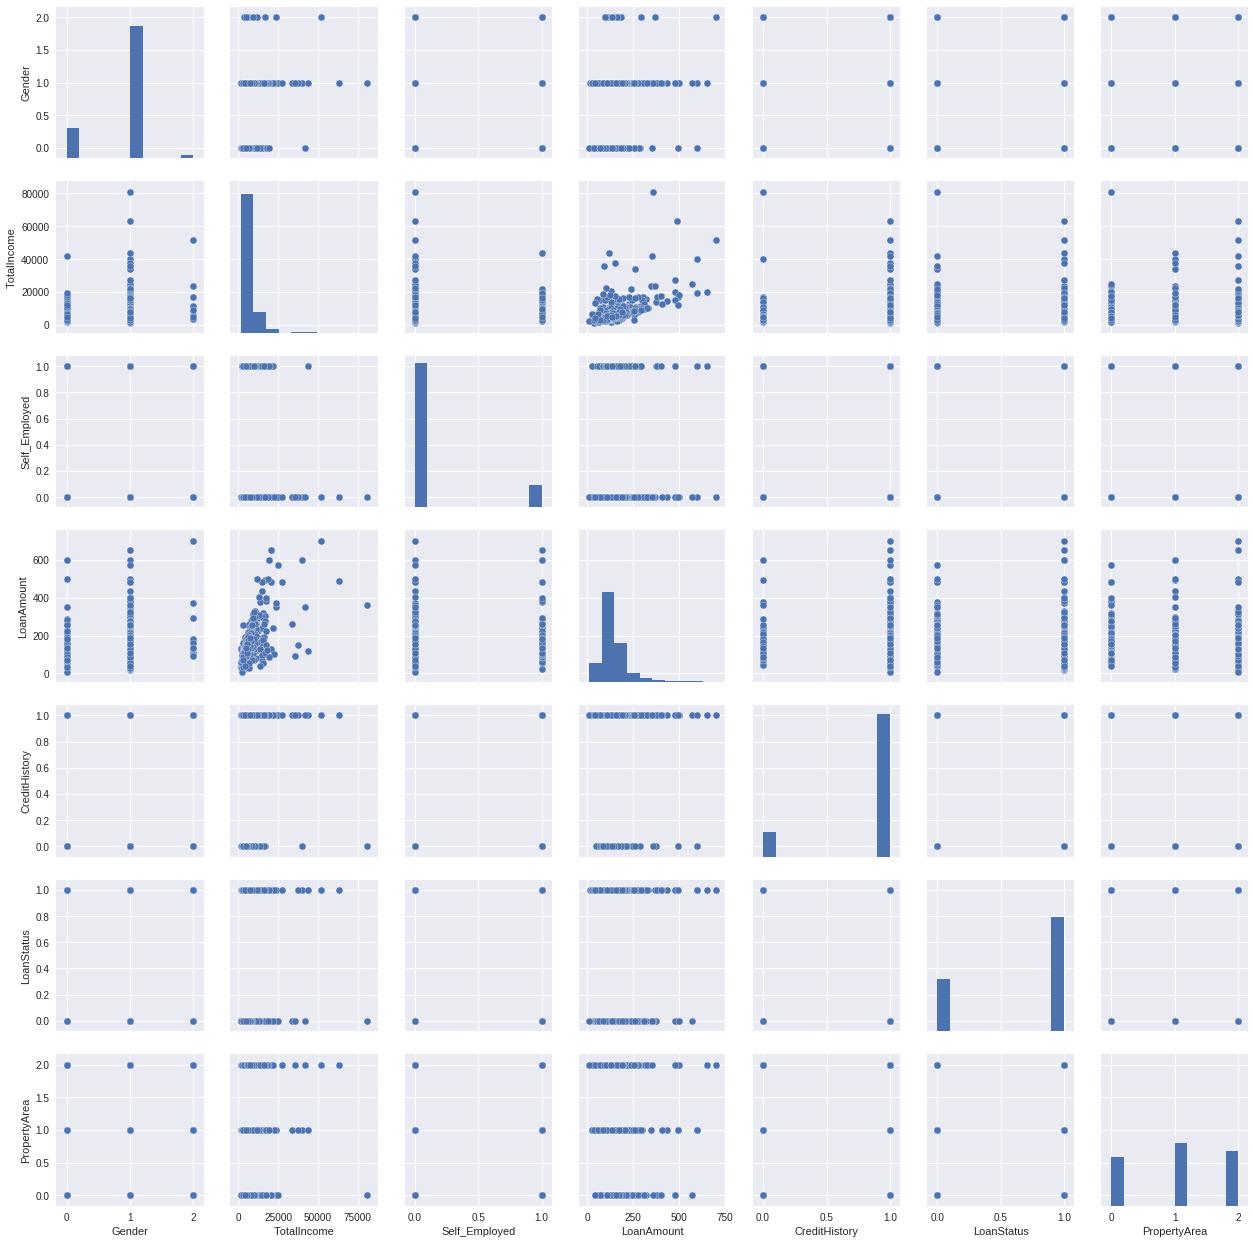

In [0]:
sns.pairplot(df3, vars=['Gender', 'TotalIncome', 'Self_Employed', 'LoanAmount', 'CreditHistory', 'LoanStatus', 'PropertyArea'])

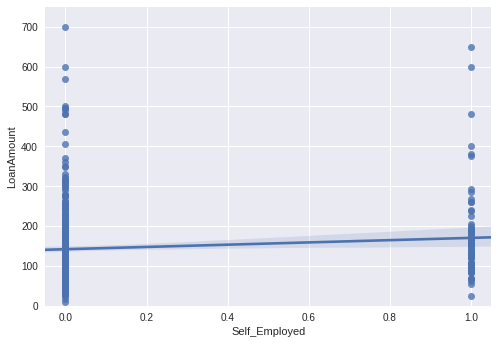

In [0]:
plt.ylim(0,750)
sns.regplot(x='Self_Employed', y='LoanAmount', data=df3)

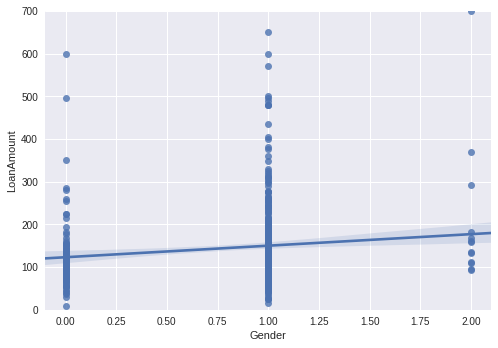

In [0]:
plt.ylim(0,700)
sns.regplot(x='Gender', y='LoanAmount', data=df3)

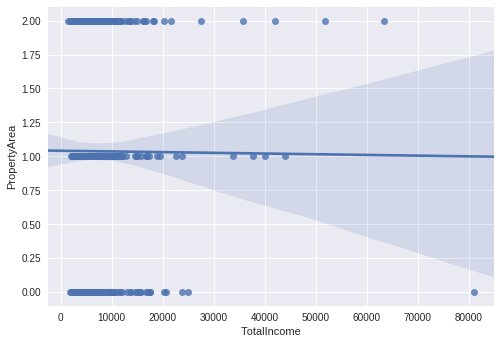

In [0]:

sns.regplot(x='TotalIncome', y='PropertyArea', data=df3)

In [0]:
np.corrcoef(df2['ApplicantIncome'], df2['LoanAmount'])

array([[1.        , 0.56518052],
       [0.56518052, 1.        ]])

In [0]:
np.corrcoef(df2['TotalIncome'], df2['LoanAmount'])

array([[1.        , 0.62031554],
       [0.62031554, 1.        ]])

In [0]:
np.corrcoef(df3['Gender'], df3['LoanAmount'])

array([[1.        , 0.13550453],
       [0.13550453, 1.        ]])

**Step 7:** Use Statistical Techniques to make quantitative statements on data. We will use a) Spearman's Rank Correlation, b) Chi-Square tables

1) Detect relationships amongst categorical, non-linearly related and non-normally distributed variables in the Loan dataset

For example: 

  a) Construct a Scatter Plot of 'Loan Term' amd 'Credit History' to verify that the variables are related non-lineraly. Create a Histogram for "Loan Term" and 'Credit History' to ascertain that they are 
     not-normally distributed. A visual examination of the data proves that 'Loan Term' and 'Credit History' are numeric variables that can be placed in categories.

  b) Compute the Spearman's Rank Correlation Coefficient

  c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'

2) Use Spearman's Rank to find the correlation between **other ** categorical, non-linearly related and non-normally distributed variables.

*Hint*: There are categorical variables in the dataset that can be coded as numeric values i.e. 0,1

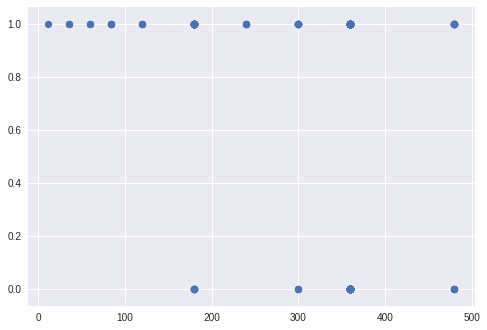

In [0]:
plt.scatter(df3['Loan_Amount_Term'], df3['CreditHistory']);

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 526.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

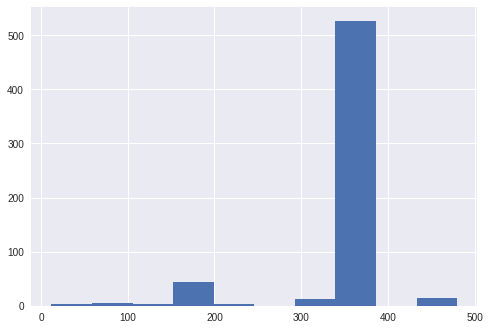

In [0]:
plt.hist(df3['Loan_Amount_Term'])

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

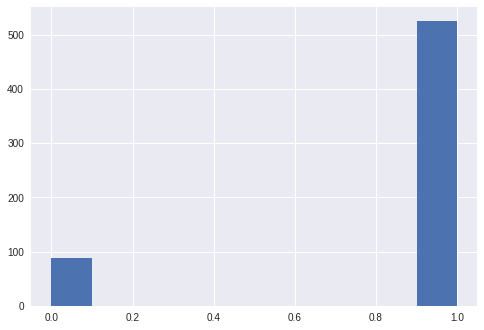

In [0]:
plt.hist(df3['CreditHistory'])

In [0]:
df3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'TotalIncome'],
      dtype='object')

In [0]:
print("===Credit History vs Loan Amount===")
print(spearmanr(df3['CreditHistory'], df3['LoanAmount']))
print("\n")

print("===Gender vs Loan Amount==")
print(spearmanr(df3['Gender'], df3['LoanAmount']))
print("\n")

print("===Loan Amount vs Dependents===")
print(spearmanr(df3['LoanAmount'], df3['Dependents']))
print("\n")

print("===Property Area vs Credit History===")
print(spearmanr(df3['CreditHistory'], df3['PropertyArea']))
print("\n")

print("===Loan Amount vs Property Area==")
print(spearmanr(df3['LoanAmount'], df3['PropertyArea']))
print("\n")

print("===Total Income vs Married===")
print(spearmanr(df3['TotalIncome'], df3['Married']))
print("\n")

print("===Education vs Self_Employed===")
print(spearmanr(df3['Education'], df3['Self_Employed']))
print("\n")

print("===Education vs Total Income===")
print(spearmanr(df3['Education'], df3['TotalIncome']))
print("\n")

===Credit History vs Loan Amount===
SpearmanrResult(correlation=0.0019317172156336768, pvalue=0.9619006838481778)


===Gender vs Loan Amount==
SpearmanrResult(correlation=0.16340202838240714, pvalue=4.740519557429244e-05)


===Loan Amount vs Dependents===
SpearmanrResult(correlation=0.14876820612112218, pvalue=0.00021608891441081095)


===Property Area vs Credit History===
SpearmanrResult(correlation=0.001359502097290786, pvalue=0.9731813664172888)


===Loan Amount vs Property Area==
SpearmanrResult(correlation=-0.10805859387353418, pvalue=0.0073626253895166275)


===Total Income vs Married===
SpearmanrResult(correlation=0.17642223478999042, pvalue=1.0965698076965791e-05)


===Education vs Self_Employed===
SpearmanrResult(correlation=-0.01038309743097777, pvalue=0.7973596811096204)


===Education vs Total Income===
SpearmanrResult(correlation=-0.19603107070706685, pvalue=9.823941089216575e-07)




In [0]:
# c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'

crosstab_table = pd.crosstab(df3['Loan_Amount_Term'], df3['CreditHistory'])
print(crosstab_table)
print("\n")

chi2, p, dof, expected = chi2_contingency(crosstab_table.values)
print("Chi2")
print(chi2)
print("\n")

print("p")
print(p)
print("\n")

print("dof")
print(dof)
print("\n")

print("expected")
print(expected)

CreditHistory     0.0  1.0
Loan_Amount_Term          
12.0                0    1
36.0                0    2
60.0                0    2
84.0                0    4
120.0               0    3
180.0              10   34
240.0               0    4
300.0               3   10
360.0              72  454
480.0               4   11


Chi2
7.959988943863511


p
0.5381833640973


dof
9


expected
[[1.44951140e-01 8.55048860e-01]
 [2.89902280e-01 1.71009772e+00]
 [2.89902280e-01 1.71009772e+00]
 [5.79804560e-01 3.42019544e+00]
 [4.34853420e-01 2.56514658e+00]
 [6.37785016e+00 3.76221498e+01]
 [5.79804560e-01 3.42019544e+00]
 [1.88436482e+00 1.11156352e+01]
 [7.62442997e+01 4.49755700e+02]
 [2.17426710e+00 1.28257329e+01]]


**Step 8**: Check for Normality - Check normality by overlaying the 'ECDF' over the 'CDF'.

Reference: https://www.andata.at/en/software-blog-reader/why-we-love-the-cdf-and-do-not-like-histograms-that-much.html

Does the distribution of 'Applicant Income' follow a normal distribution?

Hint: Code Snippet has been provided. Complete the rest of the code.



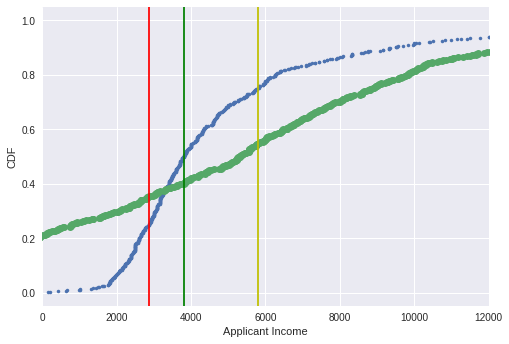

In [0]:
#Function to compute the ECDF
def ECDF(input):
 
    # Number of data points
    n = len(input)
    
    # x_data for the ECDF
    x_data = np.sort(input)

    # y_data for the ECDF
    y_data = np.arange(1, n+1) / n

    return x_data, y_data
  

#Compute ECDF 

mooseX = ECDF(df3['ApplicantIncome'])[0]
mooseY = ECDF(df3['ApplicantIncome'])[1]
percentiles = np.array([25,50,75])
ptiles = np.percentile(df3['ApplicantIncome'], percentiles)


  
#Checking the Normality of Data - we will compute the CDF by using np.random.samples to draw samples and then compare with ECDF
mean = np.mean(mooseX) 
std = np.std(mooseX)


#Draw Samples
samples = np.random.normal(mean, std, size=10000)


#Compute CDF
ostrichX = np.random.normal(loc=mean, scale=std, size=len(mooseX))
ostrichX = np.sort(ostrichX)
ostrichY = np.arange(1, len(ostrichX) + 1) / len(ostrichX)

# Generate plot
plt.plot(mooseX,mooseY, marker='.', linestyle='none')
plt.plot(ostrichX,ostrichY, marker='o', linestyle='none')
plt.xlim(0, 12000)
plt.axvline(x=ptiles[0], color='r')
plt.axvline(x=ptiles[1], color='g')
plt.axvline(x=ptiles[2], color='y')

# Label the axes
plt.xlabel('Applicant Income')
plt.ylabel('CDF')
           
# Show the plot           
plt.show()



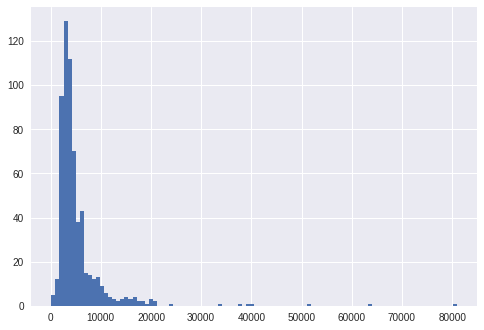

In [0]:
plt.hist(df3['ApplicantIncome'], bins=100);

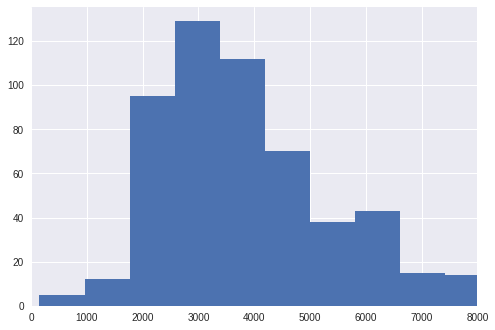

In [0]:
plt.xlim(0,8000)
plt.hist(df3['ApplicantIncome'], bins=100);

In [0]:
#State your conclusion
print("Applicant Income has several outliers that skew the distribution")
print("The distribution looks close to normal from 0 to ~ 6500, but it has an extremely long right tail with datapoints reaching all the way out to 80,000")
print("For this reason, the CDF looks very different than the ECDF")

Applicant Income has several outliers that skew the distribution
The distribution looks close to normal from 0 to ~ 6500, but it has an extremely long right tail with datapoints reaching all the way out to 80,000
For this reason, the CDF looks very different than the ECDF


**Step 9:** Use Statistical Techniques to make quantitative statements on data. 

What are the chances that the bank fail? 

Let's assume for every 0 to 1000 mortgage loans the bank makes, a certain number of loans will be defaulted on. The probability of a loan default is p = 0.05 The bank will fail if there are greater than 100 defaults.

Hint: Use the techniques applied in Coding Challenge #4




In [0]:
def conduct_binomial_trials(n,p):
  count = 0
  for i in range(1, n+1):
    if np.random.random() < p:
      count += 1
  return count

In [0]:
defaults = []
for i in range(10000):
  defaults.append(conduct_binomial_trials(1000,0.05))
print(defaults)

[45, 53, 58, 43, 52, 40, 57, 42, 50, 57, 49, 45, 51, 56, 54, 58, 50, 56, 52, 54, 61, 64, 54, 56, 52, 53, 48, 46, 47, 45, 55, 55, 56, 55, 51, 43, 52, 64, 49, 50, 49, 55, 52, 56, 52, 51, 57, 51, 47, 53, 47, 44, 53, 63, 48, 42, 42, 51, 48, 57, 54, 58, 55, 44, 52, 36, 52, 44, 45, 43, 48, 46, 52, 46, 62, 58, 52, 50, 61, 49, 47, 54, 50, 64, 42, 57, 46, 43, 47, 48, 54, 51, 52, 53, 48, 51, 53, 44, 56, 60, 43, 43, 46, 37, 48, 54, 56, 48, 52, 49, 49, 38, 45, 45, 44, 54, 49, 45, 51, 56, 49, 59, 45, 61, 43, 39, 46, 49, 47, 41, 47, 43, 43, 39, 55, 50, 60, 42, 49, 40, 48, 49, 39, 48, 45, 51, 44, 52, 71, 69, 48, 42, 49, 50, 51, 41, 50, 59, 53, 55, 43, 41, 50, 50, 52, 55, 34, 49, 53, 54, 45, 31, 48, 57, 40, 52, 43, 42, 37, 42, 45, 36, 44, 56, 46, 64, 48, 47, 49, 35, 58, 51, 53, 57, 51, 46, 61, 42, 52, 41, 40, 56, 51, 41, 35, 60, 49, 52, 47, 52, 54, 50, 49, 56, 45, 46, 48, 48, 43, 39, 55, 49, 49, 39, 58, 52, 39, 46, 48, 53, 32, 43, 53, 40, 48, 62, 43, 47, 48, 53, 48, 55, 52, 50, 52, 53, 53, 48, 44, 65,

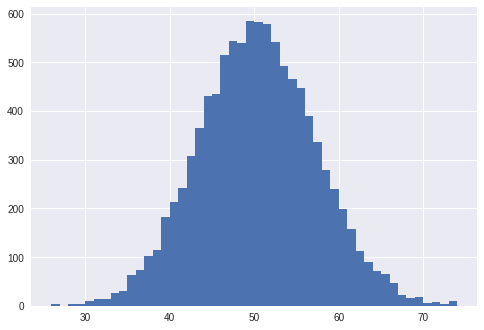

In [0]:
plt.hist(defaults, bins=range(min(defaults), max(defaults)));

In [0]:
print(max(defaults))

75


In [0]:
print("If a 10% default rate makes the bank fail, then it's extremely unlikely that the bank will fail with an expected 5% default rate")
print("After running 10,000 random samples of 1000 loans with a default rate of 5%, 0 samples turned up 100 or more defaults")
print("The highest default rate in the sample was 7.5% or 75 defaults out of 1000")

If a 10% default rate makes the bank fail, then it's extremely unlikely that the bank will fail with an expected 5% default rate
After running 10,000 random samples of 1000 loans with a default rate of 5%, 0 samples turned up 100 or more defaults
The highest default rate in the sample was 7.5% or 75 defaults out of 1000


**Step 10**: Publish findings - In this step, you are going to conduct statistical analysis on a dataset from the Data.gov website.

1) Pick a dataset (decent size dataset - approx. 10k to 15K records)

2) Walk through the statistical analysis journey highlighted within this Sprint Challenge

3) Summarize your findings at each step of the statistical analysis journey

4) Conclude your the journey with a brief section providing an overview of your findings

5) Publish your statistical analysis journey as a blog post

6) Include a link to your blog post in your submission

